<a href="https://colab.research.google.com/github/thiagolimaop/vehicle_pricing/blob/main/Modelo_de_regress%C3%A3o_Precifica%C3%A7%C3%A3o_de_Ve%C3%ADculos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo preditivo de precificação de carros

## 1. Definição do Problema

Uma revendedora de veículos se instalou em uma cidade norte americana e decidiu se utilizar de dados para realizar automatizar o processo de precificação, uma vez que avaliações manuais levam mais tempo e são de certa forma subjetivas. Esta seria uma forma de a revendedora criar criar ajustes de preços com nas condições atuais do mercado.

Eles contrataram uma empresa de consultoria automobilista para entender os fatores que influenciam nos preços.

Este projeto tentará identificar:

- Quais variáveis são significantes na predição dos preços dos carros?
- Quão bem essas variáveis descrevem o preço dos carros?

Além disso iremos criar um modelo de regressão linear para predizer o preço com base nas variáveis fornecidas. Vamos levar em consideração que o preço esta dolar.


## 2. Carga de Dados

Vamos iniciar importando as bibliotecas e carregando o arquivo .csv através do pacote Pandas.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Importação das bibliotecas usadas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
import matplotlib as mpl
from abc import ABC, abstractmethod
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.preprocessing import StandardScaler # para padronização

In [ ]:
df = pd.read_csv('car_price_prediction.csv')
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


## 3. Análise de Dados

### 3.1 Análise descritiva

Vamos iniciar examinando as dimensões do dataset, suas informações e alguns exemplos de linhas.

In [ ]:
# Mostra as dimensões do dataset
df.shape

(19237, 18)

In [ ]:
# Mostra as informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [ ]:
# Mostra as 10 primeiras linhas do dataset
df.head(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12
7,45816158,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
8,45641395,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


In [ ]:
# Mostra as 10 últimas linhas do dataset
df.tail(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
19227,45769427,29793,1053,MERCEDES-BENZ,E 350,2014,Sedan,Yes,Diesel,3.5,219030 km,6.0,Automatic,4x4,04-May,Left wheel,Black,12
19228,45773726,706,1850,MERCEDES-BENZ,E 350,2008,Sedan,Yes,Diesel,3.5,122874 km,6.0,Automatic,Rear,04-May,Left wheel,Black,12
19229,39977395,50,-,TOYOTA,Prius,2008,Hatchback,No,Hybrid,1.5,150000 km,4.0,Automatic,Front,04-May,Left wheel,Silver,6
19230,45760891,470,645,TOYOTA,Prius,2011,Hatchback,Yes,Hybrid,1.8,307325 km,4.0,Automatic,Front,04-May,Left wheel,Silver,12
19231,45772306,5802,1055,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,107800 km,6.0,Automatic,Rear,04-May,Left wheel,Grey,12
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4
19236,45813273,470,753,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923 km,4.0,Automatic,Front,04-May,Left wheel,White,12


In [ ]:
# Verifica o tipo de dataset de cada atributo
df.dtypes

ID                    int64
Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

### 3.2 Transformação e Limpeza

Nesse passo vamos realizar algumas transformações e limpar alguns dados fora da curva.

Começado pelo atributo **Levy** referente a taxas de importação/exportação dos carros, que deveria ser um atributo inteiro ou float, mas devido as '-' foi categorizado como string. Vamos consertar isso.

In [ ]:
df['Levy'] = df['Levy'].replace('-', 0)
df['Levy'] = df['Levy'].astype(int)

# Mostra as 5 primeiras linhas do dataset
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


O atributo **Mileage** referente a kilometragem rodada poderia ser um atributo inteiro também! Vamos remover o 'km' das colunas e converter o atributo.

In [ ]:
df['Mileage'] = df['Mileage'].str.replace(' km', '')
df['Mileage'] = df['Mileage'].astype(int)

# Mostra as 5 primeiras linhas do dataset
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4


O Atributo **Engine volume** deveria ser um float porém esta categorizado como uma string. Vamos ver os valores que ele apresenta e realizar o devido tratamento.

In [ ]:
df['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

A palavra **Turbo** é usada para enfatizar a potencia do motor. Logo podemos criar um atributo extra para dizer se é **Turbo** ou não.

In [ ]:
df['Is Turbo'] = df['Engine volume'].str.contains('Turbo')
df['Engine volume'] = df['Engine volume'].str.replace(' Turbo', '')
df['Engine volume'] = df['Engine volume'].astype(float)

# Mostra as 10 primeiras linhas do dataset
df.head(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Is Turbo
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,False
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,False
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,False
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,False
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,False
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2.0,160931,4.0,Automatic,Front,04-May,Left wheel,White,4,False
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909,4.0,Automatic,Front,04-May,Left wheel,White,12,False
7,45816158,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118,4.0,Automatic,Front,04-May,Left wheel,Grey,12,False
8,45641395,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069,4.0,Automatic,Front,04-May,Left wheel,Black,12,False
9,45756839,26657,0,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,False


In [ ]:
df[df['Is Turbo']].head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Is Turbo
23,45814106,7840,0,FORD,Transit,2001,Microbus,No,Diesel,2.0,230000,4.0,Manual,Front,02-Mar,Left wheel,White,0,True
25,45782859,20385,0,MERCEDES-BENZ,E 220,2006,Sedan,Yes,Diesel,2.2,210000,4.0,Tiptronic,Rear,04-May,Left wheel,Black,8,True
30,44944581,15681,1288,MERCEDES-BENZ,Vito,2007,Goods wagon,No,Diesel,2.0,180000,6.0,Manual,Rear,04-May,Left wheel,White,4,True
34,45542380,24462,0,JEEP,Grand Cherokee,2007,Jeep,Yes,Diesel,3.0,250000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,10,True
42,45667253,20165,650,VOLKSWAGEN,Jetta,2016,Sedan,Yes,Petrol,1.4,11200,4.0,Tiptronic,Front,04-May,Left wheel,Black,8,True


In [ ]:
# Mostra as resumo estatístico descritivo do dataset
df.describe()

,ID,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000,1.923700e+04,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,632.528669,2010.912824,2.307990,1.532236e+06,4.582991,6.582627
std,9.365914e+05,1.905813e+05,567.721688,5.668673,0.877805,4.840387e+07,1.199933,4.320168
min,2.074688e+07,1.000000e+00,0.000000,1939.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,0.000000,2009.000000,1.800000,7.013900e+04,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,642.000000,2012.000000,2.000000,1.260000e+05,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,917.000000,2015.000000,2.500000,1.888880e+05,4.000000,12.000000
max,4.581665e+07,2.630750e+07,11714.000000,2020.000000,20.000000,2.147484e+09,16.000000,16.000000


Analizando a variável dependente preço vemos que o valor mínimo é de 1 dolar, o que é bem suspeito. Também vemos carros no valor máximo de aproximadamente 27 Milhões. O desvio padrão tem 5 casas decimais. Não dá pra usar valores de média nesses casos para realizar as análises.

Vamos ver mais de perto o modelo de 26 milhões de dolares.

In [ ]:
df[df['Price'] > 26000000]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Is Turbo
16983,45812886,26307500,0,OPEL,Combo,1999,Goods wagon,No,Diesel,1.7,99999,4.0,Manual,Front,02-Mar,Left wheel,Blue,0,False


 Embora a Opel seja conhecida por seus modelos de qualidade e design atraente, ela se posiciona no segmento de mercado de veículos de passeio convencionais, oferecendo uma gama de modelos acessíveis para o público em geral. Logo, este modelo da **Opel** de 26 milhões deve ser considerado um erro de digitação, principalmente com as caracteristicas que ele apresenta! Portanto iremos excluir este registro do dataset!


In [ ]:
df = df.drop(df[df['ID'] == 45812886].index)
df[df['Price'] > 26000000]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Is Turbo


Outro fator importante é que, nos EUA dificilmente se encontra um carro que sai do lugar, isto é, que possui uma utilizada prática, por menos de 500 dolares. Então iremos excluir do dataset qualquer carro com valores abaixo de 500 dolares.

In [ ]:
print('Quantidade de carros abaixo de $500,00: ', df[df['Price'] < 500].shape[0])
df = df[df['Price'] >= 500]

Quantidade de carros abaixo de $500,00:  1663


A indústria automotiva dificilmente se utiliza de mais do que 6 cilindradas do motor. Logo, é bem incomum ver o valor máximo de 20 na coluna **Engine volume**. Vamos ver os modelo em questão com mais de 6 cilindradas de motor.

In [ ]:
df[df['Engine volume'] > 6]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Is Turbo
1086,45813007,1019,1935,DODGE,RAM,2014,Pickup,Yes,Diesel,6.7,367053,6.0,Automatic,Front,04-May,Left wheel,White,12,False
1125,45757249,9565,2410,CHEVROLET,Camaro,2010,Coupe,Yes,Petrol,6.2,217786,8.0,Automatic,Rear,02-Mar,Left wheel,Blue,12,False
1225,45795524,627220,0,MERCEDES-BENZ,G 65 AMG 63AMG,2020,Jeep,Yes,Petrol,6.3,0,8.0,Tiptronic,4x4,04-May,Left wheel,Black,12,True
1314,45773855,35752,3156,GMC,Yukon,2019,Sedan,Yes,Petrol,6.2,11325,8.0,Automatic,Front,04-May,Left wheel,White,12,False
2357,45803214,10036,5603,HYUNDAI,Sonata,2014,Sedan,Yes,LPG,20.0,333686,4.0,Automatic,Front,04-May,Left wheel,Silver,4,False
2922,45788165,109764,0,MERCEDES-BENZ,C 63 AMG,2011,Sedan,Yes,Petrol,6.3,73000,8.0,Tiptronic,Rear,02-Mar,Left wheel,Red,10,True
2965,45808991,83251,2578,CHEVROLET,Camaro,2016,Cabriolet,Yes,Petrol,6.2,81142,4.0,Automatic,Front,04-May,Left wheel,Black,4,False
3677,45806412,19444,1807,CADILLAC,Escalade,2012,Jeep,Yes,Petrol,6.2,137210,8.0,Automatic,Rear,04-May,Left wheel,Black,12,False
4722,45813777,175622,2819,BENTLEY,Mulsanne,2016,Sedan,Yes,Petrol,6.8,6189,8.0,Automatic,Rear,04-May,Left wheel,Black,12,False
5367,45785703,7840,5877,MERCEDES-BENZ,CLK 430,2005,Cabriolet,No,Petrol,7.3,156470,12.0,Automatic,Rear,04-May,Left wheel,Black,12,False


Os valores das cilindradas do motor foram verificados para uma boa parte dos veículos acima, e constaram como verdadeiras, exceto para o modelo **Hyunday Sonata**, apresentando 20.0 de cilindrada do motor. Foi verificado que esse modelo apresenta 2.4 de de cilindrada do motor. Vamos sobrescrever este valor.

In [ ]:
df.at[17777, 'Engine volume'] = 2.4
df.at[2357, 'Engine volume'] = 2.4
df.loc[2357]

ID                    45803214
Price                    10036
Levy                      5603
Manufacturer           HYUNDAI
Model                   Sonata
Prod. year                2014
Category                 Sedan
Leather interior           Yes
Fuel type                  LPG
Engine volume              2.4
Mileage                 333686
Cylinders                  4.0
Gear box type        Automatic
Drive wheels             Front
Doors                   04-May
Wheel               Left wheel
Color                   Silver
Airbags                      4
Is Turbo                 False
Name: 2357, dtype: object

Também podemos excluir a varíavel ID que é única para cada registro e não fará diferença nas análises e na construção do modelo.

In [ ]:
df = df.drop('ID', axis=1)
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Is Turbo
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,False
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,False
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,False
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,False
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,False


### 3.3 Análise Exploratória

Vamos entender mais sobre as correlações e distribuições das variáveis independentes em relação a variável dependente.

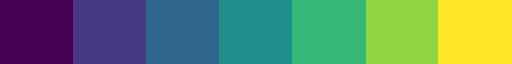

['#440154', '#443983', '#31688e', '#21918c', '#35b779', '#90d743', '#fde725']

In [ ]:
# Define paleta de cores

# # alternativa A: definição manual das cores a partir de lista de cores em hex
# coresViridis = ["#440154","#3b528b","#21918c","#5ec962","#fde725"]

# alternativa B: definição de cores utilizando palette do próprio matplotlib
# a paleta viridis é robusta para pessoas com daltonismo
vcmap = plt.get_cmap("viridis", 7) # um a mais do que o necessário para evitar utilizar o amarelo

# exibe o mapa de cores
display(vcmap)

# converte o mapa de cores em um vetor, para uso de cores individuais
coresViridis = [mpl.colors.rgb2hex(vcmap(i)) for i in range(7)] # extrai lista de cores em hex
display(coresViridis)

# define uma cor default
corDefault = coresViridis[1]

# Carrega uma folha de estilos (opcional - questões estéticas)
plt.style.use("ggplot")

# Modifica mais alguns parâmetros gráficos (opcional - questões estéticas)
plt.rc("axes", facecolor="#fafafa", grid = True)
plt.rc("grid", color = "#f0f0f0")
plt.rc("axes", edgecolor="#cccccc", lw=0.1)

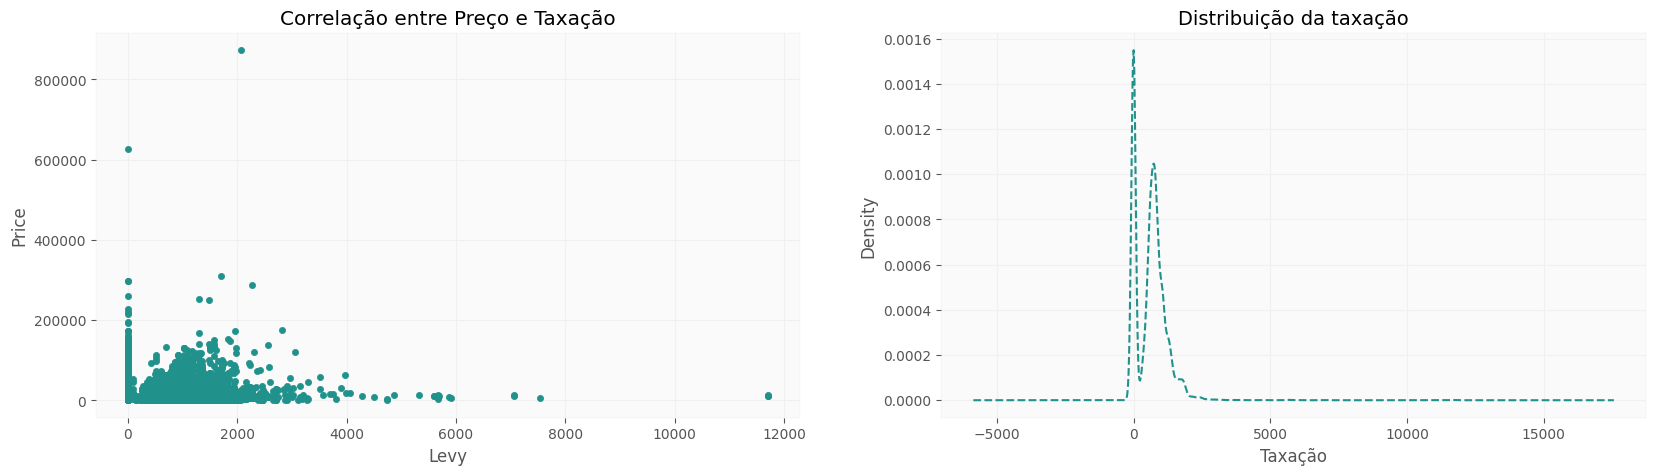

In [ ]:
fig, ax = plt.subplots(1, 2,  figsize=(20, 5))

df.plot.scatter(x='Levy', y='Price', ax=ax[0], color=coresViridis[3])
ax[0].set_title('Correlação entre Preço e Taxação')

df['Levy'].plot.kde(ls='--', color=coresViridis[3], ax=ax[1])
ax[1].set_xlabel('Taxação', fontsize=12)
ax[1].set_title('Distribuição da taxação', fontsize=14)

plt.show()

A maior parte dos veículos parece ter taxação de importação/exportação entre 0 e 2000 dólares. Porém não é possível tirar uma conclusão muito assertiva sobre o preço, uma vez que a correlação parece ser fraca, não demonstrando nenhuma tendência clara do preço em relação à esse atributo.

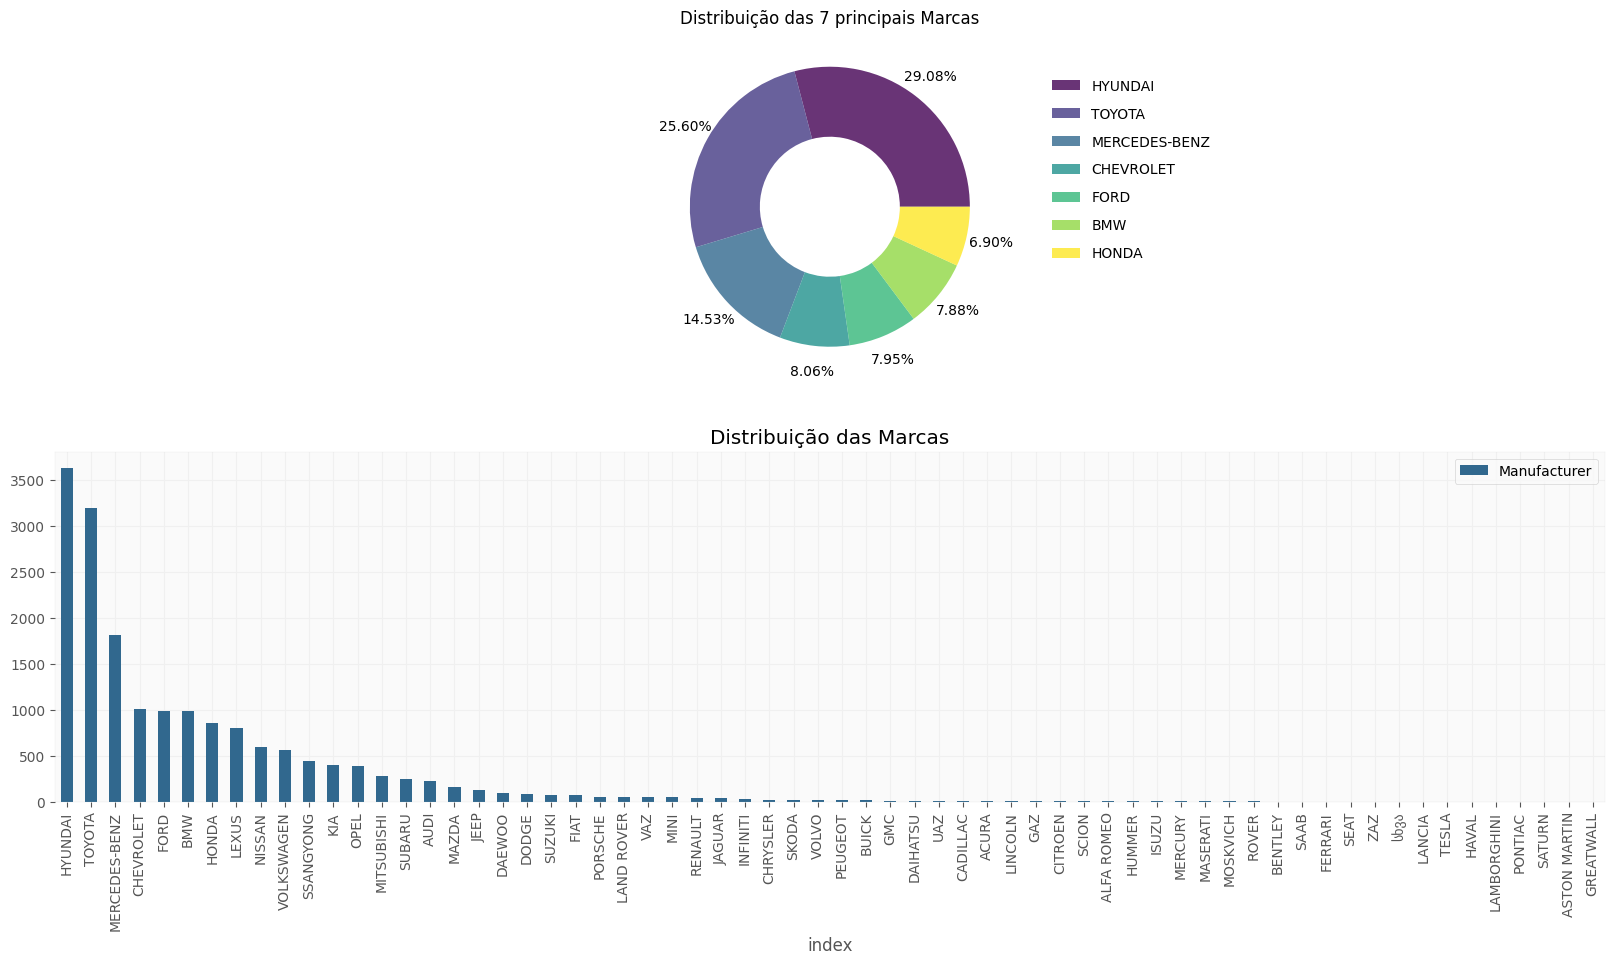

In [ ]:
fig, ax = plt.subplots(2, 1,  figsize=(20, 10))

df_chart = df['Manufacturer'].value_counts()
ax[0].pie(df_chart[0:7], autopct='{:.2f}%'.format, wedgeprops={'width':0.5,'alpha':0.8}, pctdistance=1.18, colors=coresViridis)
ax[0].legend(df_chart.index, frameon=False, bbox_to_anchor=(1.1,0.9), labelspacing=1)
ax[0].set_title('Distribuição das 7 principais Marcas', fontsize=12)

df_chart = df_chart.reset_index()
df_chart.plot.bar(x='index', y='Manufacturer', rot=90, ax=ax[1], color=coresViridis[2])
ax[1].set_title('Distribuição das Marcas')

plt.show()

Existem muitas marcas com uma representação muito baixa para realizar a modelagem estatística. Logo, temos que restringir as marcas que irão compor o modelo para facilitar o aprendizado e assim fazer com que o modelo possa generalizar na predição. Vamos usar a marca FIAT para testar.

In [ ]:
df_chart[df_chart['index'] == 'FIAT']

,index,Manufacturer
21,FIAT,72


Podemos traçar um limiar com marcas que tenham uma representação inferior a 72 registros.

In [ ]:
marcas = list(df_chart[df_chart['Manufacturer'] > 71]['index'])

df = df[df['Manufacturer'].isin(marcas)]

Vamos estudar melhor o atributo Modelo.

In [ ]:
# Exibir a quantidade de modelos do dataset
df['Model'].nunique()

1356

Será que a quantidade de modelos está bem distribuida entre as marcas? Quantos registros existem para cada modelo/marcar?

In [ ]:
df_marcas = df.groupby('Manufacturer')['Model'].count().to_frame()
df_model = df.groupby('Manufacturer')['Model'].nunique().to_frame()

df_marcas.rename(columns={'Model': 'Total'}, inplace=True)
df_final = pd.concat([df_marcas, df_model], axis=1)
df_final['Registers by Model'] = df_final['Total'] / df_final['Model']

df_final.sort_values('Registers by Model', ascending=False)

,Total,Model,Registers by Model
Manufacturer,,,
SSANGYONG,441,5,88.200000
HYUNDAI,3629,70,51.842857
DAEWOO,91,3,30.333333
CHEVROLET,1006,49,20.530612
TOYOTA,3195,160,19.968750
LEXUS,800,44,18.181818
HONDA,861,62,13.887097
KIA,399,33,12.090909
FORD,992,84,11.809524


Considerando que temos 14 atributos além da marca do veículo e do modelo. Seria interessante usarmos apenas marcar que tenham uma quantidade maior de registros por marca/modelo, para que tenhamos uma amostra mais representativa considerando os demais atributos. Logo, poderiamos restringir ainda mais o dataset para usar apenas registros que sejam de marcas onde temos no mínimo 5 registros para cada modelo/marca do veículo em média, para ampliar o poder de generalização do nosso modelo estatístico.

In [ ]:
marcas = list(df_final[df_final['Registers by Model'] > 5].index)

df = df[df['Manufacturer'].isin(marcas)]

Vamos construir um gráfico de dispersão para entender melhor a correlação entre a preço e ano de produção.

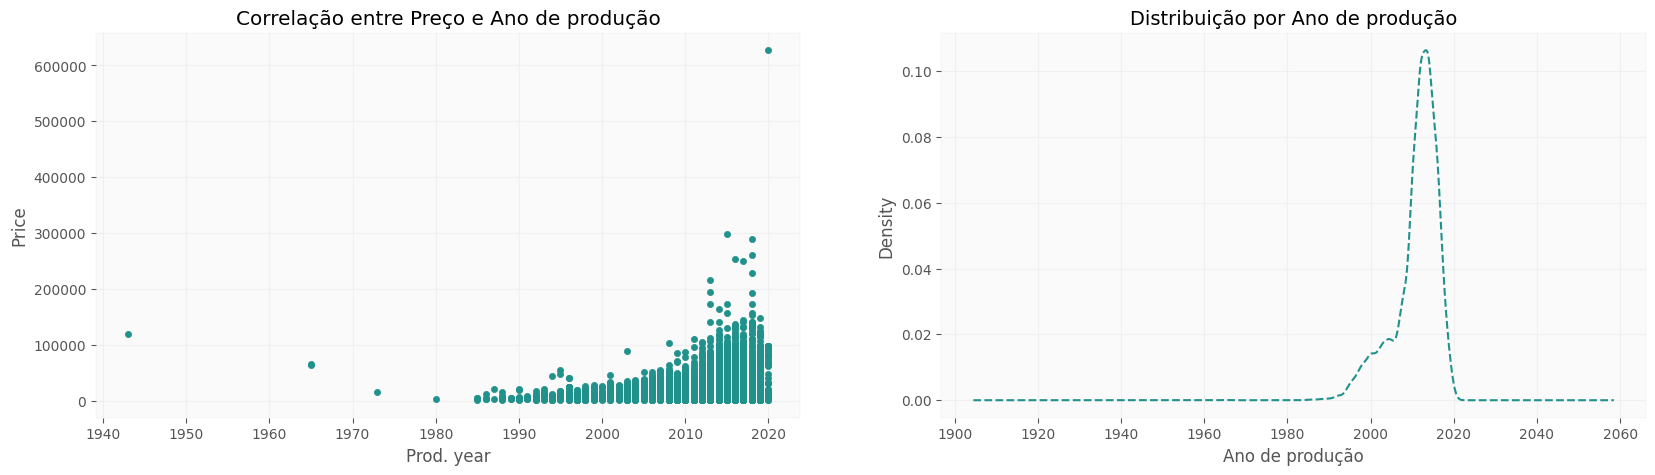

In [ ]:
fig, ax = plt.subplots(1, 2,  figsize=(20, 5))

df.plot.scatter(x='Prod. year', y='Price', ax=ax[0], color=coresViridis[3])
ax[0].set_title('Correlação entre Preço e Ano de produção')

df['Prod. year'].plot.kde(ls='--', color=coresViridis[3], ax=ax[1])
ax[1].set_xlabel('Ano de produção', fontsize=12)
ax[1].set_title('Distribuição por Ano de produção', fontsize=14)

plt.show()

A grande maioria dos veículos esta aproximadamente entre os anos de 2000 e 2020. A correlação chega a ser forte, mas parece mostrar tendência tímida de crescimento de preço a medida que o ano aumenta, se desconsiderarmos os outliers antes dos anos de 1980. Vamos ver mais detalhes destes outliers.

In [ ]:
df[(df['Prod. year'] < 1985) | (df['Price'] > 600000)]

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Is Turbo
1225,627220,0,MERCEDES-BENZ,G 65 AMG 63AMG,2020,Jeep,Yes,Petrol,6.3,0,8.0,Tiptronic,4x4,04-May,Left wheel,Black,12,True
6607,119172,0,MERCEDES-BENZ,230 W153,1943,Sedan,Yes,Petrol,2.2,69000,4.0,Automatic,Rear,04-May,Left wheel,White,0,False
7667,65858,0,FORD,Mustang,1965,Coupe,Yes,Petrol,4.7,68800,8.0,Automatic,Front,02-Mar,Left wheel,Red,2,False
9774,2700,0,VOLKSWAGEN,Transporter,1980,Minivan,No,Petrol,2.0,111111,4.0,Manual,Rear,04-May,Left wheel,Beige,0,False
13973,64290,3965,FORD,Mustang,1965,Coupe,Yes,Petrol,4.7,1142,8.0,Automatic,Rear,02-Mar,Left wheel,Red,12,True
17634,15681,0,CHEVROLET,Impala,1973,Limousine,Yes,Petrol,5.7,100000,8.0,Automatic,Rear,04-May,Left wheel,Brown,0,False


Vemos que temos pouquíssimos registros de veículos com ano de fabricação antes de 1985. Além do mais dificilmente alguém procuraria um carro usado com fabricação antes de 1985, ou com preço de 600 mil dolares. Portanto, como a quantidade de registros para treinar nosso modelo estatístico com essas características são muito ínfimos, iremos remover estes registros do nosso dataset.

In [ ]:
df = df[(df['Prod. year'] >= 1985) & (df['Price'] < 600000)]

Abaixo, vamos entender mais sobre a distrtibuição das categorias.

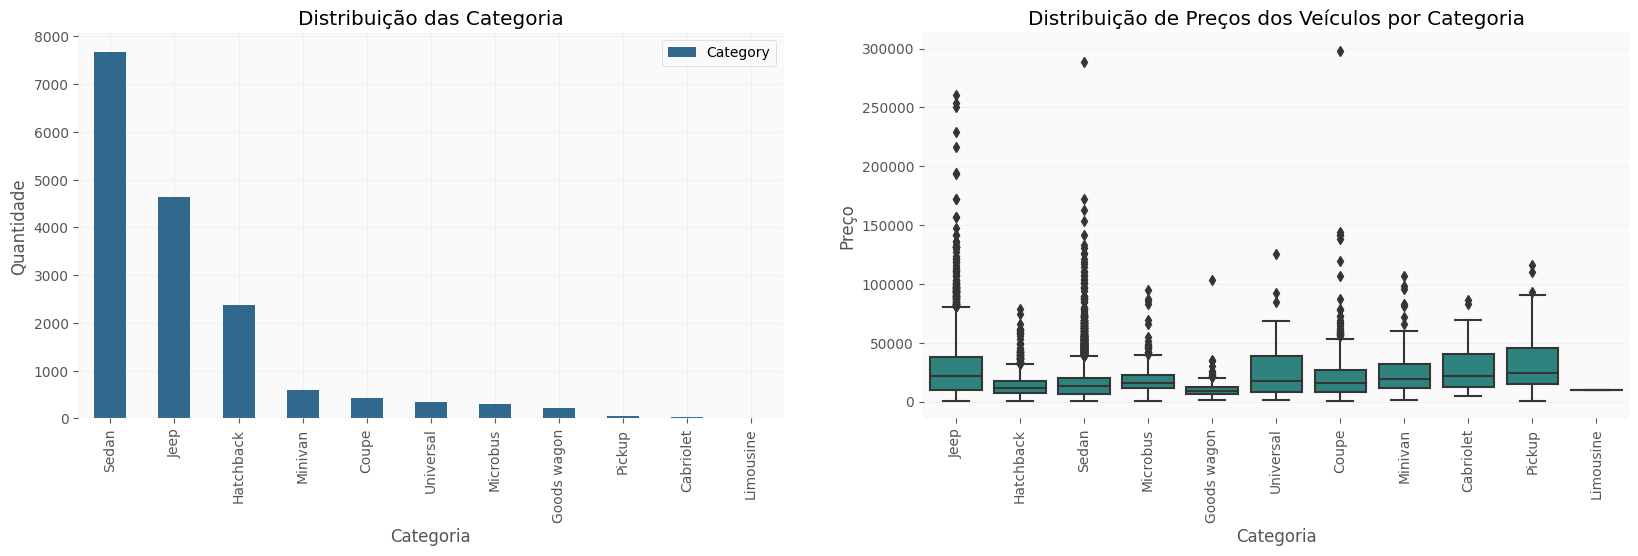

In [ ]:
df['Category'].unique()

fig, ax = plt.subplots(1, 2,  figsize=(20, 5))

df_chart = df['Category'].value_counts()

df_chart = df_chart.reset_index()
df_chart.plot.bar(x='index', y='Category', rot=90, ax=ax[0], color=coresViridis[2])
ax[0].set_title('Distribuição das Categoria')
ax[0].set_xlabel('Categoria')
ax[0].set_ylabel('Quantidade')

# Plota o boxplot no segundo eixo
sns.boxplot(y='Price', x='Category', data=df, color=coresViridis[3], ax=ax[1])

# Ajusta os títulos e as legendas
ax[1].set_title('Distribuição de Preços dos Veículos por Categoria')
ax[1].set_xlabel('Categoria')
ax[1].set_ylabel('Preço')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

plt.show()

Sedans, Jeeps e Hatchbacks representam a grande maioria esmagadora de categoria dos veículos. As diferenças entre as distribuições para cada classe da categoria pode ser encarada de forma positiva, visto que essa variabilidade pode ajudar os algoritmos a tomar decisões de forma mais fácil, tornando essa variável um possível bom preditor. Vamos ver mais sobre a categoria Limosine.

In [ ]:
df[df['Category'] == 'Limousine']

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Is Turbo
8198,9408,0,MERCEDES-BENZ,E 230,1996,Limousine,No,CNG,2.3,310000,4.0,Manual,Rear,04-May,Left wheel,Silver,2,False


Como temos apenas um único registro (o que impossibilitaria um treinamento adequado), é interessante remové-lo do dataset, por ser um outlier de uma categoria muito específica e que dificilmente seria procurado pelos clientes da revendedora.

In [ ]:
df = df[df['Category'] != 'Limousine']

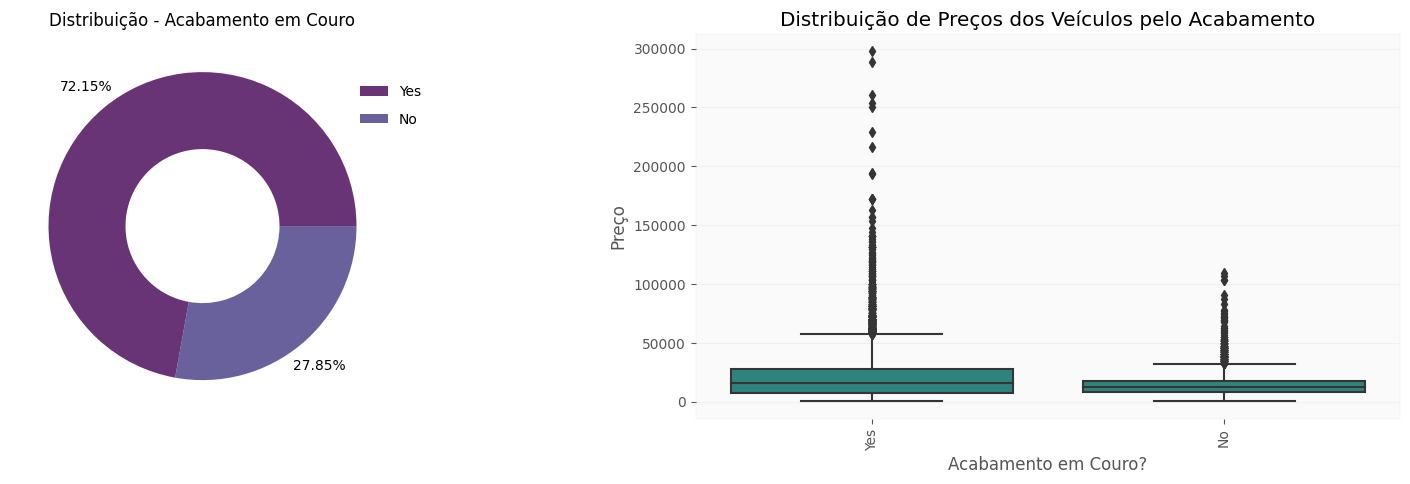

In [ ]:
fig, ax = plt.subplots(1, 2,  figsize=(20, 5))

df_chart = df['Leather interior'].value_counts()
ax[0].pie(df_chart, autopct='{:.2f}%'.format, wedgeprops={'width':0.5,'alpha':0.8}, pctdistance=1.18, colors=coresViridis)
ax[0].legend(df_chart.index, frameon=False, bbox_to_anchor=(1.1,0.9), labelspacing=1)
ax[0].set_title('Distribuição - Acabamento em Couro', fontsize=12)

# Plota o boxplot no segundo eixo
sns.boxplot(y='Price', x='Leather interior', data=df, color=coresViridis[3], ax=ax[1])

# Ajusta os títulos e as legendas
ax[1].set_title('Distribuição de Preços dos Veículos pelo Acabamento')
ax[1].set_xlabel('Acabamento em Couro?')
ax[1].set_ylabel('Preço')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

plt.show()

É possível ver que veículos sem acabamento em couro geralmente expressam preços com um intervalo menor demonstrado pelo intervalo interquartil, ou seja, com uma variabilidade menor. Olhando para veículos com acabamento em couro, essa variabilidade o preço se torna mais alta. Essas diferenças nas distribuições podem ser positivas, possivelmente tornando essa variável uma boa preditora.

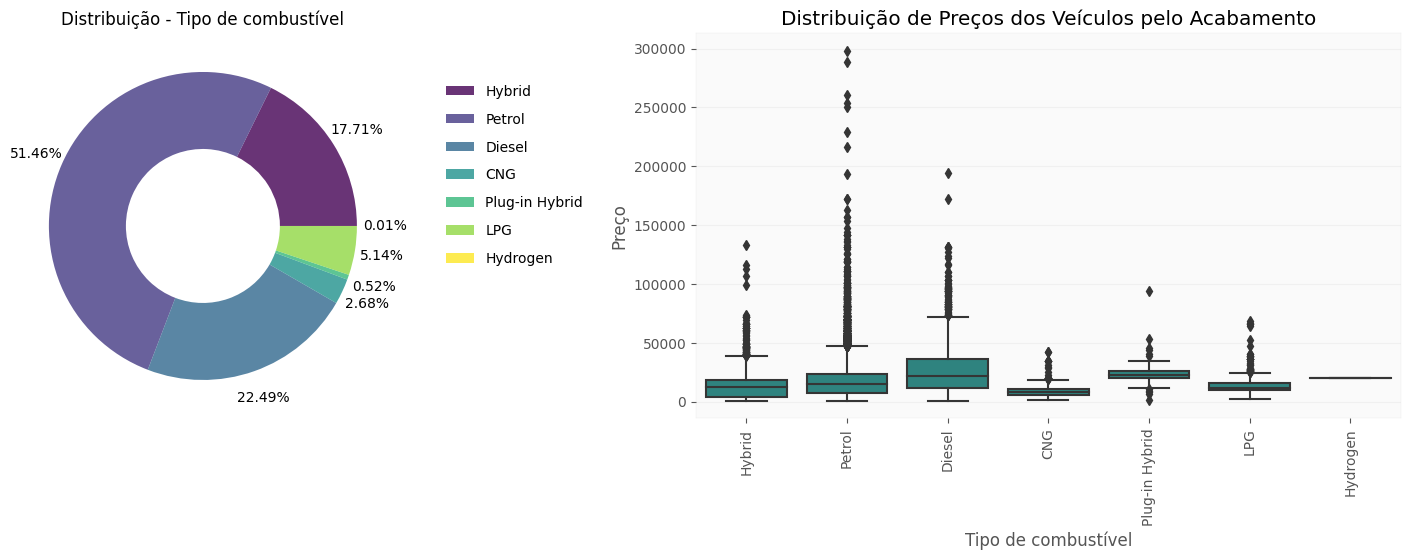

In [ ]:
fig, ax = plt.subplots(1, 2,  figsize=(20, 5))

df_chart = df['Fuel type'].value_counts(sort=False)
ax[0].pie(df_chart, autopct='{:.2f}%'.format, wedgeprops={'width':0.5,'alpha':0.8}, pctdistance=1.18, colors=coresViridis)
ax[0].legend(df_chart.index, frameon=False, bbox_to_anchor=(1.1,0.9), labelspacing=1)
ax[0].set_title('Distribuição - Tipo de combustível', fontsize=12)

# Plota o boxplot no segundo eixo
sns.boxplot(y='Price', x='Fuel type', data=df, color=coresViridis[3], ax=ax[1])

# Ajusta os títulos e as legendas
ax[1].set_title('Distribuição de Preços dos Veículos pelo Acabamento')
ax[1].set_xlabel('Tipo de combustível')
ax[1].set_ylabel('Preço')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

plt.show()

As classes para o atributo Tipo de combustível estão bem desbalanceadas, porém as diferenças nas distribuições das classes em relação à variável dependente Preço, provavelmente tornam esse atributo um bom preditor. Vamos dar uma olhada nos veículos movidos a hidrogênio.

In [ ]:
df[df['Fuel type'] == 'Hydrogen']

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Is Turbo
12900,20385,0,HYUNDAI,Sonata Hybrid,2012,Sedan,Yes,Hydrogen,2.4,116800,6.0,Tiptronic,Front,04-May,Left wheel,Grey,8,False


Como existe apenas um único modelo de veículo movido a Hidrogênio, acho que vale a pena remové-lo, por se tratar de um outlier e prejudicar o treinamento do modelo.

In [ ]:
df = df[df['Fuel type'] != 'Hydrogen']

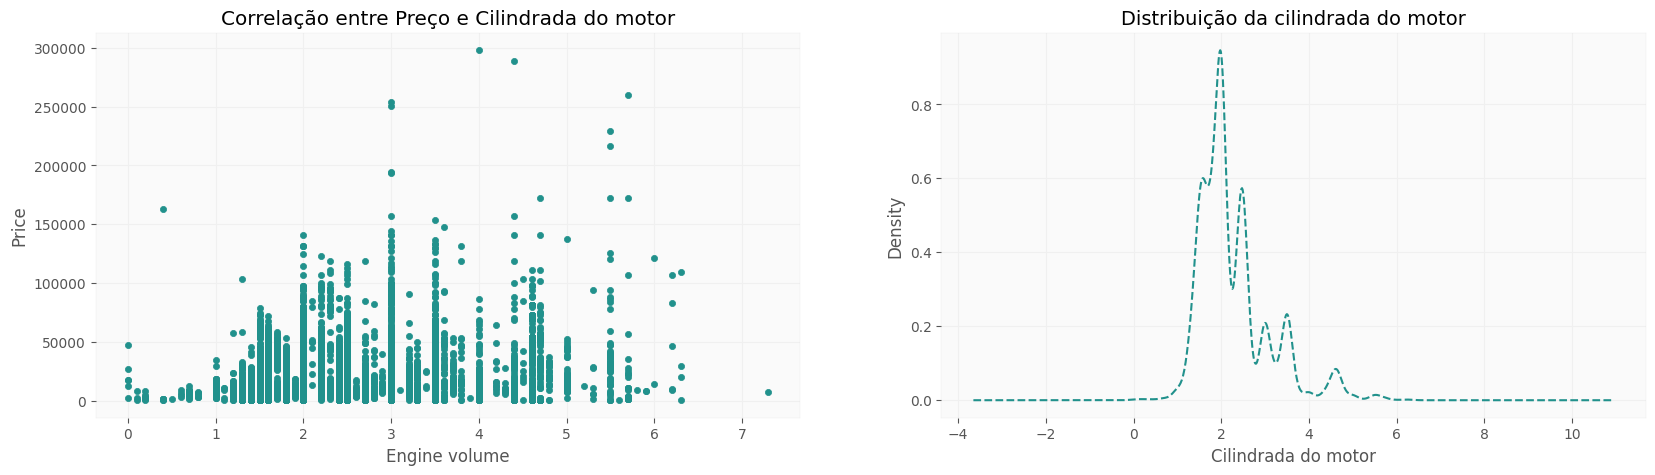

In [ ]:
fig, ax = plt.subplots(1, 2,  figsize=(20, 5))

df.plot.scatter(x='Engine volume', y='Price', ax=ax[0], color=coresViridis[3])
ax[0].set_title('Correlação entre Preço e Cilindrada do motor')

df['Engine volume'].plot.kde(ls='--', color=coresViridis[3], ax=ax[1])
ax[1].set_xlabel('Cilindrada do motor', fontsize=12)
ax[1].set_title('Distribuição da cilindrada do motor', fontsize=14)

plt.show()

A grande maioria dos veículos parece ter entre 1 e 2 cilindradas do motor. Porém não é possível tirar uma conclusão clara entre os preços levando em consideração essa variável, uma vez que a correlação parece ser fraca e não demonstra uma tendência clara.

Chama a atenção o outlier com cilindrada do motor de aproximadamente 7.4. Dificilmente se achariam carros usados com esta característica, então acredito ser interessante remove-lo do dataset também.


In [ ]:
df = df[df['Engine volume'] < 7]

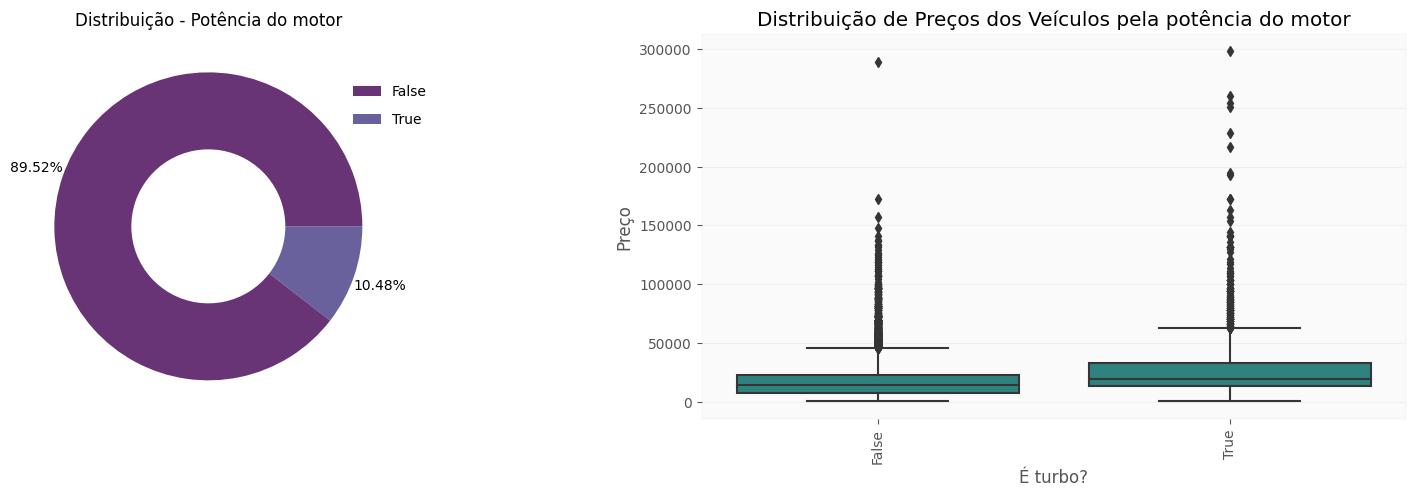

In [ ]:
fig, ax = plt.subplots(1, 2,  figsize=(20, 5))

df_chart = df['Is Turbo'].value_counts()
ax[0].pie(df_chart, autopct='{:.2f}%'.format, wedgeprops={'width':0.5,'alpha':0.8}, pctdistance=1.18, colors=coresViridis)
ax[0].legend(df_chart.index, frameon=False, bbox_to_anchor=(1.1,0.9), labelspacing=1)
ax[0].set_title('Distribuição - Potência do motor', fontsize=12)

# Plota o boxplot no segundo eixo
sns.boxplot(y='Price', x='Is Turbo', data=df, color=coresViridis[3], ax=ax[1])

# Ajusta os títulos e as legendas
ax[1].set_title('Distribuição de Preços dos Veículos pela potência do motor')
ax[1].set_xlabel('É turbo?')
ax[1].set_ylabel('Preço')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

plt.show()

Pouco mais de 10% do dataset é composto por veículos com turbo compressor. As distribuições desta variável em relação à variável dependente preço, possuem uma leve diferença, o que pode beneficiar a generelização do modelo.

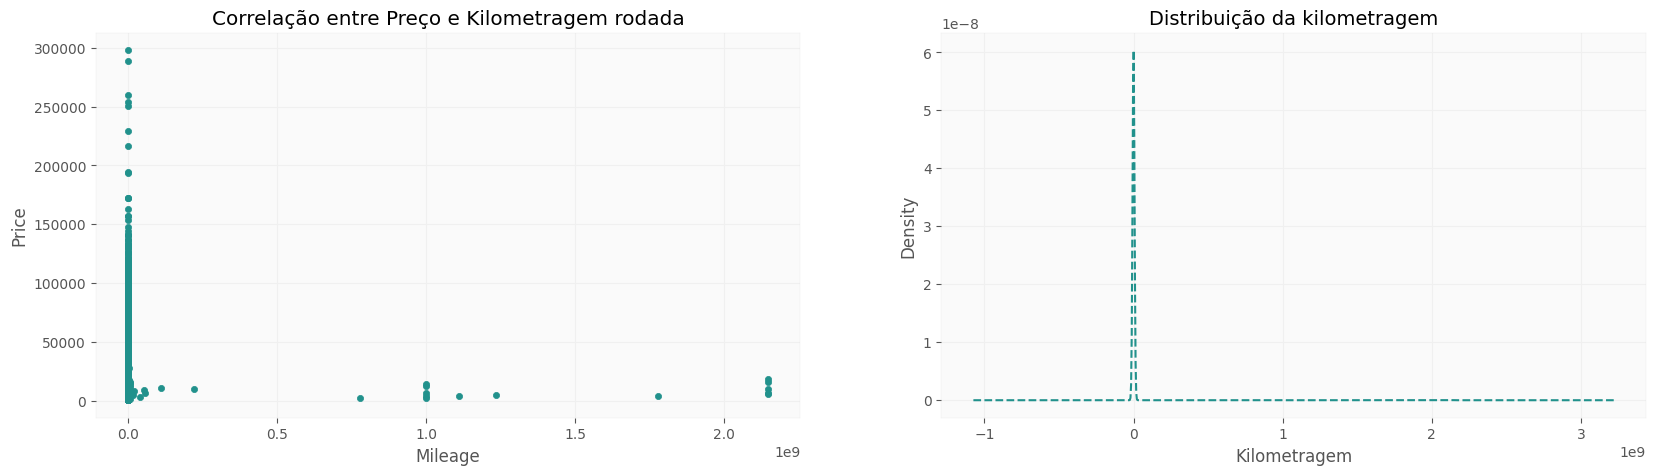

In [ ]:
fig, ax = plt.subplots(1, 2,  figsize=(20, 5))

df.plot.scatter(x='Mileage', y='Price', ax=ax[0], color=coresViridis[3])
ax[0].set_title('Correlação entre Preço e Kilometragem rodada')

df['Mileage'].plot.kde(ls='--', color=coresViridis[3], ax=ax[1])
ax[1].set_xlabel('Kilometragem', fontsize=12)
ax[1].set_title('Distribuição da kilometragem', fontsize=14)

plt.show()

Um motor não aguenta rodar mais do que 500 mil km, na melhor das hipóteses. Porém como o hodômetro do veículo esta associado ao motor original, mesmo que o motor seja trocado o hodômetro continuará a contagem, podendo atingir kilometragens muito acima dos 500 mil km como vemos nos outliers. A correlação parece ser fraca.

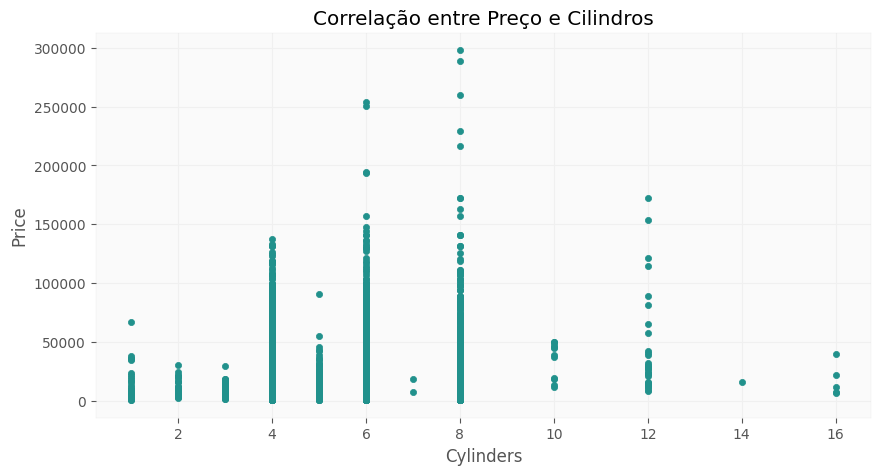

In [ ]:
fig, ax = plt.subplots(1, 1,  figsize=(10, 5))

df.plot.scatter(x='Cylinders', y='Price', ax=ax, color=coresViridis[3])
ax.set_title('Correlação entre Preço e Cilindros')
plt.show()

A quantidade de cilindros do motor parece ter uma correlação fraca em relação à variável dependente.

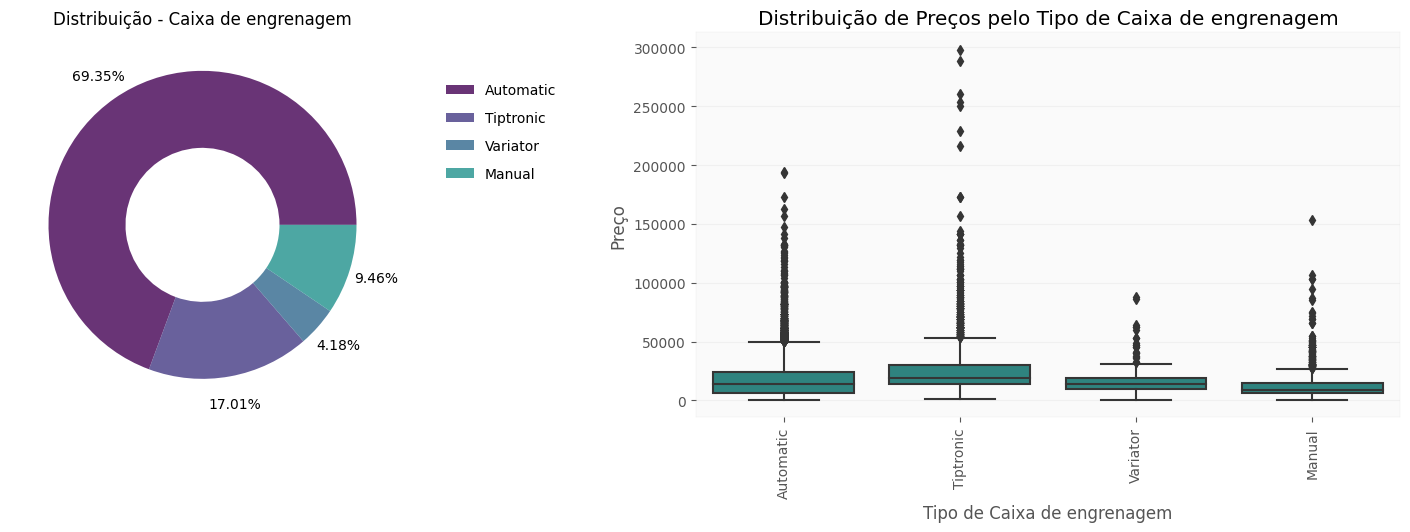

In [ ]:
fig, ax = plt.subplots(1, 2,  figsize=(20, 5))

df_chart = df['Gear box type'].value_counts(sort=False)
ax[0].pie(df_chart, autopct='{:.2f}%'.format, wedgeprops={'width':0.5,'alpha':0.8}, pctdistance=1.18, colors=coresViridis)
ax[0].legend(df_chart.index, frameon=False, bbox_to_anchor=(1.1,0.9), labelspacing=1)
ax[0].set_title('Distribuição - Caixa de engrenagem', fontsize=12)

# Plota o boxplot no segundo eixo
sns.boxplot(y='Price', x='Gear box type', data=df, color=coresViridis[3], ax=ax[1])

# Ajusta os títulos e as legendas
ax[1].set_title('Distribuição de Preços pelo Tipo de Caixa de engrenagem')
ax[1].set_xlabel('Tipo de Caixa de engrenagem')
ax[1].set_ylabel('Preço')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

plt.show()

A grande maioria esmagadora possui transmissão automática. As distribuições para as classes automática e tiptronic apresenta bastante semelhança entre si, assim como as distribuições das classes variator e manual.

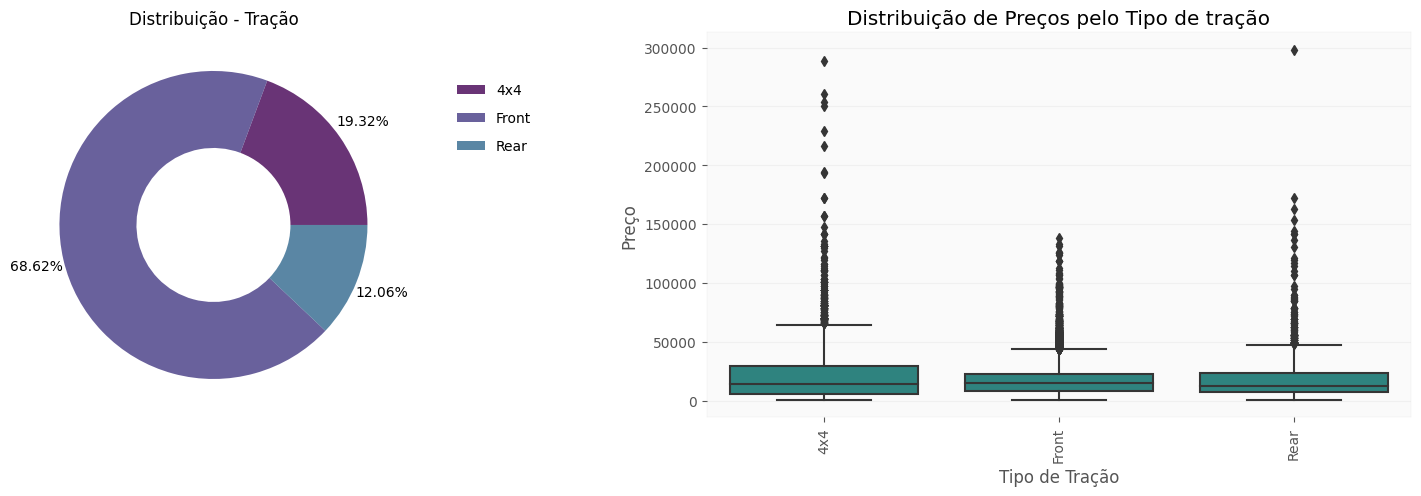

In [ ]:
fig, ax = plt.subplots(1, 2,  figsize=(20, 5))

df_chart = df['Drive wheels'].value_counts(sort=False)
ax[0].pie(df_chart, autopct='{:.2f}%'.format, wedgeprops={'width':0.5,'alpha':0.8}, pctdistance=1.18, colors=coresViridis)
ax[0].legend(df_chart.index, frameon=False, bbox_to_anchor=(1.1,0.9), labelspacing=1)
ax[0].set_title('Distribuição - Tração', fontsize=12)

# Plota o boxplot no segundo eixo
sns.boxplot(y='Price', x='Drive wheels', data=df, color=coresViridis[3], ax=ax[1])

# Ajusta os títulos e as legendas
ax[1].set_title('Distribuição de Preços pelo Tipo de tração')
ax[1].set_xlabel('Tipo de Tração')
ax[1].set_ylabel('Preço')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

plt.show()

A grande maior parte das

In [ ]:
df.corr()

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,Is Turbo
Price,1.000000,0.071204,0.344679,0.171700,-0.016155,0.127299,-0.007459,0.179789
Levy,0.071204,1.000000,0.375952,0.318044,-0.017947,0.210871,0.087294,-0.166553
Prod. year,0.344679,0.375952,1.000000,-0.060478,-0.051703,-0.118624,0.218337,-0.093584
Engine volume,0.171700,0.318044,-0.060478,1.000000,-0.008312,0.786256,0.221816,-0.005254
Mileage,-0.016155,-0.017947,-0.051703,-0.008312,1.000000,-0.002593,-0.010355,0.000165
Cylinders,0.127299,0.210871,-0.118624,0.786256,-0.002593,1.000000,0.179277,0.044317
Airbags,-0.007459,0.087294,0.218337,0.221816,-0.010355,0.179277,1.000000,0.072559
Is Turbo,0.179789,-0.166553,-0.093584,-0.005254,0.000165,0.044317,0.072559,1.000000
